In [1]:
import os

os.chdir('..')

In [2]:
import tensorflow as tf
from keras import backend as K
from reinforce import Reinforcement
from keras.models import Sequential
from model import Model 
from prediction import Predictor
from predictSMILES import *
from utils import *
import numpy as np

2022-03-01 15:50:28.137128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 15:50:28.137165: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-01 15:50:30.975696: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-01 15:50:30.976378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-01 15:50:30.976402: W tensorflow/stream_ex

In [3]:
config_file = 'configReinforce.json' # Configuration file
property_identifier = 'a2d' # It can be 'a2d', kor', 'qed', 'sas', 'logP', or 'jak2'

os.environ["CUDA_VISIBLE_DEVICES"]="0"
session = tf.compat.v1.Session()
K.set_session(session)

In [4]:
# load configuration file
configReinforce,exp_time=load_config(config_file)

main.py -function- load_config


In [5]:
# Load generator object
generator_model = Sequential()
generator_model = Model(configReinforce)
generator_model.model.load_weights(configReinforce.model_name_unbiased)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'generator_model\LSTM_2layer_adam_d3.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
configReinforce.keys()

dict_keys(['exp_name', 'file_path_logP', 'file_path_jak2', 'file_path_a2d', 'file_path_kor', 'file_path_generated', 'output', 'paddSize', 'data_length', 'units', 'num_epochs', 'optimizer', 'seed', 'batch_size', 'validation_split', 'verbose_training', 'dropout', 'learning_rate', 'finetune_sample_num', 'model_name_unbiased', 'model_name_biased', 'n_iterations', 'n_to_generate', 'n_policy', 'threshold_set', 'n_to_draw', 'evaluateSmiles'])

In [7]:
configReinforce['model_name_unbiased']

'generator_model\\LSTM_2layer_adam_d3.hdf5'

In [8]:
generator_model.model.load_weights('generator_model/LSTM_2layer_adam_d3.hdf5')

In [9]:
# Initialize lists to evaluate the model
difs = [] # List with the differences between the averages of the desired property distributions (G_0 and G_optimized)
divs = [] # List with the internal diversities of the G_optimized generated molecules 
perc_valid = [] # List with the % of valid SMILES generated by G_optimized
    
# To compute SA score or qed it's not necessary to have a Predictor model
if property_identifier != 'sas' and property_identifier != 'qed':
    # Load the Predictor object
    predictor = Predictor(configReinforce,property_identifier)
else:
    predictor = None

Models 0 loaded from disk!
Models 1 loaded from disk!
Models 2 loaded from disk!
Models 3 loaded from disk!
Models 4 loaded from disk!


In [10]:
for k,v in configReinforce.items():
    print(f'{k}:{v}')

exp_name:Model
file_path_logP:data/logP_labels.csv
file_path_jak2:data/jak2_data.csv
file_path_a2d:data/data_clean_a2d.csv
file_path_kor:data/data_clean_kop.csv
file_path_generated:data/generated
output:createdSMILES/newSmiles_
paddSize:65
data_length:0
units:256
num_epochs:16
optimizer:adam
seed:56
batch_size:10
validation_split:0.1
verbose_training:True
dropout:0.3
learning_rate:0.001
finetune_sample_num:10
model_name_unbiased:generator_model\LSTM_2layer_adam_d3.hdf5
model_name_biased:generator_model\LSTM_2layer_adam_d3_updated
n_iterations:75
n_to_generate:5000
n_policy:7
threshold_set:2
n_to_draw:2
evaluateSmiles:True


In [11]:
# Create Reinforcement Learning object
RL_obj = Reinforcement(generator_model, predictor,configReinforce,property_identifier)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'generator_model\LSTM_2layer_adam_d3.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [18]:
configReinforce['model_name_unbiased'] = 'generator_model/LSTM_2layer_adam_d3.hdf5'
configReinforce['model_name_biased'] = 'generator_model/LSTM_2layer_adam_d3_updated'
# Create Reinforcement Learning object
RL_obj = Reinforcement(generator_model, predictor,configReinforce,property_identifier)

....................................
updated model load_weights is DONE!


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   0%|▋                                                                                                                                                | 25/5000 [00:39<1:50:25,  1.33s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.46s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   1%|█▊                                                                                                                                               | 63/5000 [01:33<2:04:37,  1.51s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   2%|██▉                                                                                                                                             | 101/5000 [02:29<2:12:17,  1.62s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   3%|████                                                                                                                                            | 139/5000 [03:25<2:08:31,  1.59s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   4%|█████                                                                                                                                           | 177/5000 [04:28<2:24:10,  1.79s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   4%|██████▏                                                                                                                                         | 215/5000 [05:35<2:41:52,  2.03s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   5%|███████▎                                                                                                                                        | 253/5000 [06:49<2:10:54,  1.65s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   6%|████████▍                                                                                                                                       | 291/5000 [07:48<1:58:17,  1.51s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.38s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   7%|█████████▍                                                                                                                                      | 329/5000 [08:39<1:45:24,  1.35s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   7%|██████████▌                                                                                                                                     | 367/5000 [09:35<1:51:20,  1.44s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   8%|███████████▋                                                                                                                                    | 405/5000 [10:32<1:51:58,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.52s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   9%|████████████▊                                                                                                                                   | 443/5000 [11:27<1:34:59,  1.25s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.38s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  10%|█████████████▊                                                                                                                                  | 481/5000 [12:23<1:37:36,  1.30s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.17s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  10%|██████████████▉                                                                                                                                 | 519/5000 [13:16<1:46:05,  1.42s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.38s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  11%|████████████████                                                                                                                                | 557/5000 [14:09<1:48:42,  1.47s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  12%|█████████████████▏                                                                                                                              | 595/5000 [15:07<1:49:15,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  13%|██████████████████▏                                                                                                                             | 633/5000 [16:02<1:21:25,  1.12s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.46s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  13%|███████████████████▎                                                                                                                            | 671/5000 [16:59<1:50:00,  1.52s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  14%|████████████████████▍                                                                                                                           | 709/5000 [17:55<1:50:46,  1.55s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.40s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  15%|█████████████████████▌                                                                                                                          | 747/5000 [18:50<1:40:07,  1.41s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  16%|██████████████████████▌                                                                                                                         | 785/5000 [19:46<1:46:45,  1.52s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  16%|███████████████████████▋                                                                                                                        | 823/5000 [20:43<1:39:18,  1.43s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.49s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  17%|████████████████████████▊                                                                                                                       | 861/5000 [21:47<2:01:46,  1.77s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.57s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  18%|█████████████████████████▉                                                                                                                      | 899/5000 [22:56<1:45:53,  1.55s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  19%|██████████████████████████▉                                                                                                                     | 937/5000 [23:54<1:45:54,  1.56s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  20%|████████████████████████████                                                                                                                    | 975/5000 [25:00<1:40:07,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  20%|████████████████████████████▉                                                                                                                  | 1013/5000 [25:57<1:31:37,  1.38s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  21%|██████████████████████████████                                                                                                                 | 1051/5000 [26:51<1:38:22,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  22%|███████████████████████████████▏                                                                                                               | 1089/5000 [27:47<1:46:18,  1.63s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.39s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  23%|████████████████████████████████▏                                                                                                              | 1127/5000 [28:44<1:34:25,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  23%|█████████████████████████████████▎                                                                                                             | 1165/5000 [29:39<1:39:28,  1.56s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  24%|██████████████████████████████████▍                                                                                                            | 1203/5000 [30:33<1:31:44,  1.45s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  25%|███████████████████████████████████▍                                                                                                           | 1241/5000 [31:32<1:31:43,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  26%|████████████████████████████████████▌                                                                                                          | 1279/5000 [32:34<1:32:54,  1.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  26%|█████████████████████████████████████▋                                                                                                         | 1317/5000 [33:33<1:27:55,  1.43s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  27%|██████████████████████████████████████▊                                                                                                        | 1355/5000 [34:31<1:32:31,  1.52s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.66s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  28%|███████████████████████████████████████▊                                                                                                       | 1393/5000 [35:28<1:33:39,  1.56s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  29%|████████████████████████████████████████▉                                                                                                      | 1431/5000 [36:24<1:39:43,  1.68s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.04s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  29%|██████████████████████████████████████████                                                                                                     | 1469/5000 [37:22<1:25:18,  1.45s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  30%|███████████████████████████████████████████                                                                                                    | 1507/5000 [38:15<1:24:17,  1.45s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  31%|████████████████████████████████████████████▏                                                                                                  | 1545/5000 [39:10<1:26:49,  1.51s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  32%|█████████████████████████████████████████████▎                                                                                                 | 1583/5000 [40:05<1:24:06,  1.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.53s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  32%|██████████████████████████████████████████████▎                                                                                                | 1621/5000 [41:01<1:22:30,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  33%|███████████████████████████████████████████████▍                                                                                               | 1659/5000 [41:55<1:24:26,  1.52s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  34%|████████████████████████████████████████████████▌                                                                                              | 1697/5000 [42:52<1:18:47,  1.43s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  35%|█████████████████████████████████████████████████▌                                                                                             | 1735/5000 [43:47<1:20:40,  1.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  35%|██████████████████████████████████████████████████▋                                                                                            | 1773/5000 [44:44<1:24:37,  1.57s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  36%|███████████████████████████████████████████████████▊                                                                                           | 1811/5000 [45:41<1:19:47,  1.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  37%|████████████████████████████████████████████████████▉                                                                                          | 1849/5000 [46:38<1:15:45,  1.44s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  38%|█████████████████████████████████████████████████████▉                                                                                         | 1887/5000 [47:33<1:17:22,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  38%|███████████████████████████████████████████████████████                                                                                        | 1925/5000 [48:29<1:18:25,  1.53s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  39%|████████████████████████████████████████████████████████▏                                                                                      | 1963/5000 [49:23<1:10:32,  1.39s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.57s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  40%|█████████████████████████████████████████████████████████▏                                                                                     | 2001/5000 [50:18<1:14:34,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  41%|██████████████████████████████████████████████████████████▎                                                                                    | 2039/5000 [51:13<1:17:02,  1.56s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  42%|███████████████████████████████████████████████████████████▍                                                                                   | 2077/5000 [52:10<1:06:14,  1.36s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  42%|████████████████████████████████████████████████████████████▍                                                                                  | 2115/5000 [53:06<1:12:01,  1.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  43%|█████████████████████████████████████████████████████████████▌                                                                                 | 2153/5000 [54:02<1:11:16,  1.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  44%|██████████████████████████████████████████████████████████████▋                                                                                | 2191/5000 [54:57<1:09:06,  1.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  45%|███████████████████████████████████████████████████████████████▋                                                                               | 2229/5000 [55:51<1:04:33,  1.40s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.51s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  45%|████████████████████████████████████████████████████████████████▊                                                                              | 2267/5000 [56:47<1:09:04,  1.52s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.40s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  46%|█████████████████████████████████████████████████████████████████▉                                                                             | 2305/5000 [57:41<1:08:31,  1.53s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  47%|███████████████████████████████████████████████████████████████████                                                                            | 2343/5000 [58:36<1:03:42,  1.44s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.47s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  48%|████████████████████████████████████████████████████████████████████                                                                           | 2381/5000 [59:33<1:05:03,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  48%|████████████████████████████████████████████████████████████████████▏                                                                        | 2419/5000 [1:00:29<1:04:26,  1.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.37s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  49%|██████████████████████████████████████████████████████████████████████▎                                                                        | 2457/5000 [1:01:22<54:16,  1.28s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  50%|██████████████████████████████████████████████████████████████████████▎                                                                      | 2495/5000 [1:02:19<1:03:48,  1.53s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.38s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  51%|███████████████████████████████████████████████████████████████████████▍                                                                     | 2533/5000 [1:03:14<1:01:56,  1.51s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  51%|█████████████████████████████████████████████████████████████████████████▌                                                                     | 2571/5000 [1:04:07<58:08,  1.44s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  52%|██████████████████████████████████████████████████████████████████████████▌                                                                    | 2609/5000 [1:05:01<51:39,  1.30s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  53%|██████████████████████████████████████████████████████████████████████████▋                                                                  | 2647/5000 [1:05:55<1:00:16,  1.54s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.16s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  54%|████████████████████████████████████████████████████████████████████████████▊                                                                  | 2685/5000 [1:06:51<51:11,  1.33s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  54%|█████████████████████████████████████████████████████████████████████████████▉                                                                 | 2723/5000 [1:07:45<56:35,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  55%|██████████████████████████████████████████████████████████████████████████████▉                                                                | 2761/5000 [1:08:41<58:08,  1.56s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  56%|████████████████████████████████████████████████████████████████████████████████                                                               | 2799/5000 [1:09:35<54:28,  1.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.36s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  57%|█████████████████████████████████████████████████████████████████████████████████▏                                                             | 2837/5000 [1:10:30<50:12,  1.39s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.52s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  57%|██████████████████████████████████████████████████████████████████████████████████▏                                                            | 2875/5000 [1:11:26<52:58,  1.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  58%|███████████████████████████████████████████████████████████████████████████████████▎                                                           | 2913/5000 [1:12:22<52:11,  1.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  59%|████████████████████████████████████████████████████████████████████████████████████▍                                                          | 2951/5000 [1:13:17<48:42,  1.43s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  60%|█████████████████████████████████████████████████████████████████████████████████████▍                                                         | 2989/5000 [1:14:11<50:21,  1.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  61%|██████████████████████████████████████████████████████████████████████████████████████▌                                                        | 3027/5000 [1:15:13<55:46,  1.70s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  61%|███████████████████████████████████████████████████████████████████████████████████████▋                                                       | 3065/5000 [1:16:12<51:15,  1.59s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.13s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  62%|████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 3103/5000 [1:17:11<47:48,  1.51s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.69s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  63%|████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 3141/5000 [1:18:14<1:03:23,  2.05s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 3179/5000 [1:19:10<49:28,  1.63s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  64%|████████████████████████████████████████████████████████████████████████████████████████████                                                   | 3217/5000 [1:20:08<49:25,  1.66s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  65%|█████████████████████████████████████████████████████████████████████████████████████████████                                                  | 3255/5000 [1:21:06<44:46,  1.54s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  66%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 3293/5000 [1:22:02<42:29,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 3331/5000 [1:22:57<40:33,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.10s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 3369/5000 [1:23:51<30:44,  1.13s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 3407/5000 [1:24:52<47:14,  1.78s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 3445/5000 [1:25:53<35:37,  1.37s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 3483/5000 [1:26:49<35:11,  1.39s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.52s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 3521/5000 [1:27:45<35:35,  1.44s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 3559/5000 [1:28:42<37:30,  1.56s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 3597/5000 [1:29:38<34:20,  1.47s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 3635/5000 [1:30:34<35:54,  1.58s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.04s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 3673/5000 [1:31:31<34:39,  1.57s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 3711/5000 [1:32:29<32:05,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 3749/5000 [1:33:25<30:28,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.51s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 3787/5000 [1:34:23<30:45,  1.52s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.47s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 3825/5000 [1:35:20<28:54,  1.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 3863/5000 [1:36:16<27:38,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 3901/5000 [1:37:13<27:04,  1.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 3939/5000 [1:38:08<26:21,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 3977/5000 [1:39:06<27:14,  1.60s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 4015/5000 [1:40:01<22:23,  1.36s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 4053/5000 [1:40:57<22:58,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 4091/5000 [1:41:53<21:39,  1.43s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.57s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 4129/5000 [1:42:48<20:45,  1.43s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.57s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 4167/5000 [1:43:44<20:09,  1.45s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.51s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 4205/5000 [1:44:42<20:38,  1.56s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 4243/5000 [1:45:39<18:39,  1.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 4281/5000 [1:46:36<17:30,  1.46s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 4319/5000 [1:47:34<17:57,  1.58s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 4357/5000 [1:48:30<16:21,  1.53s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 4395/5000 [1:49:25<14:17,  1.42s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 4433/5000 [1:50:21<14:19,  1.52s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 4471/5000 [1:51:18<13:33,  1.54s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.53s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 4509/5000 [1:52:14<10:12,  1.25s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 4547/5000 [1:53:12<11:50,  1.57s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 4585/5000 [1:54:09<10:39,  1.54s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.72s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 4623/5000 [1:55:05<09:17,  1.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 4661/5000 [1:56:02<09:37,  1.70s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 4699/5000 [1:56:56<07:00,  1.40s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.34s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 4737/5000 [1:57:55<06:30,  1.49s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 4775/5000 [1:58:50<05:16,  1.41s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 4813/5000 [1:59:48<04:53,  1.57s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 4851/5000 [2:00:46<03:49,  1.54s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 4889/5000 [2:01:41<02:28,  1.34s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 4927/5000 [2:02:39<01:52,  1.55s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 4965/5000 [2:03:36<00:50,  1.43s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [2:04:28<00:00,  1.49s/it]
[18:08:20] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 26

RDKit ERROR: [18:08:20] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 26
RDKit ERROR: 
RDKit ERROR: [18:08:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [18:08:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3
RDKit ERROR: 
[18:08:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

[18:08:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3

RDKit ERROR: [18:08:20] Can't kekulize mol.  Unkekulized atoms: 9 10 11 19 20
[18:08:20] Can't kekulize mol.  Unkekulized atoms: 9 10 11 19 20

RDKit ERROR: 
RDKit ERROR: [18:08:20] SMILES Parse Error: extra close parentheses while parsing: Cc1ccccc1CN1CCC2c3ccccc3)CCC21
RDKit ERROR: [18:08:20] SMILES Parse Error: Failed parsing SMILE

RDKit ERROR: [18:08:21] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [18:08:21] SMILES Parse Error: extra close parentheses while parsing: Cc1ncccn1)N1CCN(c2ccccn2)CC1
[18:08:21] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17

[18:08:21] SMILES Parse Error: extra close parentheses while parsing: Cc1ncccn1)N1CCN(c2ccccn2)CC1
RDKit ERROR: [18:08:21] SMILES Parse Error: Failed parsing SMILES 'Cc1ncccn1)N1CCN(c2ccccn2)CC1' for input: 'Cc1ncccn1)N1CCN(c2ccccn2)CC1'
RDKit ERROR: [18:08:21] SMILES Parse Error: extra close parentheses while parsing: CC1c2ccccn2)CCN1c1ccccn1
RDKit ERROR: [18:08:21] SMILES Parse Error: Failed parsing SMILES 'CC1c2ccccn2)CCN1c1ccccn1' for input: 'CC1c2ccccn2)CCN1c1ccccn1'
RDKit ERROR: [18:08:21] SMILES Parse Error: extra open parentheses for input: 'Cc1ccccc1CN1CCN(C2CN(c2ccccn2)CC1'
RDKit ERROR: [18:08:21] SMILES Parse Error: unclosed ring for input: 'CC1CN2CCC(c2ccccn2)CC1'
RDKit ERROR: [18:08:21] SMILES Parse Error:

RDKit ERROR: [18:08:21] SMILES Parse Error: unclosed ring for input: 'CC12CCC(c3ccccc3)CC1'
[18:08:21] SMILES Parse Error: unclosed ring for input: 'CC12CCC(c3ccccc3)CC1'
RDKit ERROR: [18:08:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[18:08:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

RDKit ERROR: 
RDKit ERROR: [18:08:21] SMILES Parse Error: extra open parentheses for input: 'Cc1ccccc1CN1CCN(c2nc(ccc2)nc1'
[18:08:21] SMILES Parse Error: extra open parentheses for input: 'Cc1ccccc1CN1CCN(c2nc(ccc2)nc1'
RDKit ERROR: [18:08:21] SMILES Parse Error: extra close parentheses while parsing: Nc1ccccc1CN1CCC2Cc3ccccc32)CC1
[18:08:21] SMILES Parse Error: extra close parentheses while parsing: Nc1ccccc1CN1CCC2Cc3ccccc32)CC1
RDKit ERROR: [18:08:21] SMILES Parse Error: Failed parsing SMILES 'Nc1ccccc1CN1CCC2Cc3ccccc32)CC1' for input: 'Nc1ccccc1CN1CCC2Cc3ccccc32)CC1'
[18:08:21] SMILES Parse Error: Failed parsing SMILES 'Nc1ccccc1CN1CCC2Cc3ccccc32)CC1' for input: 'Nc1ccccc1CN1CCC2

[18:08:21] Can't kekulize mol.  Unkekulized atoms: 1 2 10 11 12

RDKit ERROR: [18:08:21] SMILES Parse Error: extra close parentheses while parsing: Cc1ccccc1CN1CCN2c2ccccn2)CC1
[18:08:21] SMILES Parse Error: extra close parentheses while parsing: Cc1ccccc1CN1CCN2c2ccccn2)CC1
RDKit ERROR: [18:08:21] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1CN1CCN2c2ccccn2)CC1' for input: 'Cc1ccccc1CN1CCN2c2ccccn2)CC1'
RDKit ERROR: [18:08:21] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CN1CCN(c2ccnn3Cc2ccccn2)CC1'
[18:08:21] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1CN1CCN2c2ccccn2)CC1' for input: 'Cc1ccccc1CN1CCN2c2ccccn2)CC1'
[18:08:21] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CN1CCN(c2ccnn3Cc2ccccn2)CC1'
RDKit ERROR: [18:08:21] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CN1CCN(C(=O)C23CC4c2ccccc2O1)CC3'
RDKit ERROR: [18:08:21] SMILES Parse Error: extra close parentheses while parsing: CC1=C2c3ccccc3C2N2N=Cc3ccccc3)CC21
RDKit ERROR: [18:08:21] S

[18:08:21] SMILES Parse Error: extra close parentheses while parsing: CC1c2ccccc2CN1CC12CCN(c3ncccn3)CC2)CC1
[18:08:21] SMILES Parse Error: Failed parsing SMILES 'CC1c2ccccc2CN1CC12CCN(c3ncccn3)CC2)CC1' for input: 'CC1c2ccccc2CN1CC12CCN(c3ncccn3)CC2)CC1'
[18:08:21] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CN1CCC2c2ccccc2'
RDKit ERROR: [18:08:21] SMILES Parse Error: extra open parentheses for input: 'Cc1ccccc1CN1CNN(c2ccc(nc2)CC1'
[18:08:21] SMILES Parse Error: extra open parentheses for input: 'Cc1ccccc1CN1CNN(c2ccc(nc2)CC1'
RDKit ERROR: [18:08:21] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CN1CCN(c3ccccn2)CC1'
[18:08:21] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CN1CCN(c3ccccn2)CC1'
RDKit ERROR: [18:08:21] SMILES Parse Error: unclosed ring for input: 'CC1CC2(C)CC3(CCC1)CC2'
RDKit ERROR: [18:08:21] SMILES Parse Error: extra close parentheses while parsing: CC1CN2CCC1c2ccccn2)CC1
[18:08:21] SMILES Parse Error: unclosed ring for input: 'CC1CC2(C)CC3

RDKit ERROR: 
RDKit ERROR: [18:08:21] SMILES Parse Error: unclosed ring for input: 'Cc1ccc2c3ccccc1n2'
[18:08:21] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1CN1CCNCc2ccccn2)CC1' for input: 'Cc1ccccc1CN1CCNCc2ccccn2)CC1'
[18:08:21] SMILES Parse Error: unclosed ring for input: 'CC1CCCN1cCcccnc1'
[18:08:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3

RDKit ERROR: [18:08:21] SMILES Parse Error: extra close parentheses while parsing: CC1c2ccccc2)CCN1c1ccccn1
RDKit ERROR: [18:08:21] SMILES Parse Error: Failed parsing SMILES 'CC1c2ccccc2)CCN1c1ccccn1' for input: 'CC1c2ccccc2)CCN1c1ccccn1'
RDKit ERROR: [18:08:21] SMILES Parse Error: unclosed ring for input: 'CC1c2ccccc2CC12CNc2ccccc21'
[18:08:21] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8

[18:08:21] SMILES Parse Error: unclosed ring for input: 'Cc1ccc2c3ccccc1n2'
[18:08:21] SMILES Parse Error: extra close parentheses while parsing: CC1c2ccccc2)CCN1c1ccccn1
[18:08:21] SMILES Parse Error: Failed parsing SMILES 'CC1c2ccccc2)CC

[18:08:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

RDKit ERROR: [18:08:22] SMILES Parse Error: unclosed ring for input: 'CC1(CCN2CCN(c3ccccn3)CC2)Cc2cccnc2'
RDKit ERROR: [18:08:22] SMILES Parse Error: extra open parentheses for input: 'CC1=CCN(C(c2ccccn2)CC1'
[18:08:22] SMILES Parse Error: unclosed ring for input: 'CC1(CCN2CCN(c3ccccn3)CC2)Cc2cccnc2'
RDKit ERROR: [18:08:22] SMILES Parse Error: extra close parentheses while parsing: CC1(Cc3ccccn3)CCNCC2)CC1
RDKit ERROR: [18:08:22] SMILES Parse Error: Failed parsing SMILES 'CC1(Cc3ccccn3)CCNCC2)CC1' for input: 'CC1(Cc3ccccn3)CCNCC2)CC1'
RDKit ERROR: [18:08:22] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CN1C(=O)c2cccc(N2CCN(c2ccncn3)CC2)CC1'
RDKit ERROR: [18:08:22] SMILES Parse Error: extra close parentheses while parsing: Cc1ccccc1CN1CCNc2ccccn2)CC1
RDKit ERROR: [18:08:22] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1CN1CCNc2ccccn2)CC1' for input: 'Cc1ccccc1CN1CCNc2ccccn2)CC1'
[18:08:22] SMILES Parse Error: 

RDKit ERROR: [18:08:22] SMILES Parse Error: extra close parentheses while parsing: Nc1ccccc1CN1CCNCc2ccccn2)CC1
RDKit ERROR: [18:08:22] SMILES Parse Error: Failed parsing SMILES 'Nc1ccccc1CN1CCNCc2ccccn2)CC1' for input: 'Nc1ccccc1CN1CCNCc2ccccn2)CC1'
[18:08:22] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1CN1CCN(C2CCc3ccccc3)CC2)CC1' for input: 'Cc1ccccc1CN1CCN(C2CCc3ccccc3)CC2)CC1'
[18:08:22] SMILES Parse Error: extra close parentheses while parsing: Nc1ccccc1CN1CCNCc2ccccn2)CC1
[18:08:22] SMILES Parse Error: Failed parsing SMILES 'Nc1ccccc1CN1CCNCc2ccccn2)CC1' for input: 'Nc1ccccc1CN1CCNCc2ccccn2)CC1'
RDKit ERROR: [18:08:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 10
RDKit ERROR: 
[18:08:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 10

RDKit ERROR: [18:08:22] SMILES Parse Error: extra open parentheses for input: 'Cc1ccccc1CN1CCN(c2ccc(nc2)CC1'
[18:08:22] SMILES Parse Error: extra open parentheses for input: 'Cc1ccccc1CN1CCN(c2ccc(nc2)CC1'
RDKit E

Proportion of valid SMILES: 0.951


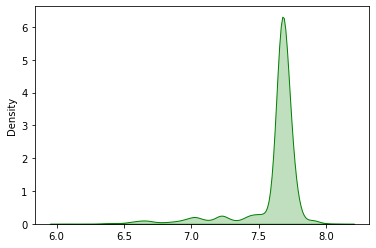

In [19]:
    # SMILES generation with unbiased Generator 
#    smiles_original, prediction_original,valid,unique,div = RL_obj.test_generator(configReinforce.n_to_generate,0,True)
    
#      Training Generator with RL    
#    RL_obj.policy_gradient()
    
# SMILES generation after 85 training iterations 
smiles_iteration85,prediction_iteration85,valid,unique,div,perc_desirable = RL_obj.test_generator(configReinforce.n_to_generate,85, False)

In [ ]:
# To directly compare the original and biased models several times, evaluating
# prediction differences, diversity, and validity
for k in range(20):
    print("BIASED GENERATION: " + str(k))
    dif,div,valid,perc_uniq,perc_desirable = RL_obj.compare_models(configReinforce.n_to_generate,True)
    difs.append(dif)
    divs.append(div)
    perc_valid.append(valid)
print("Mean value difference: " + str(np.mean(difs)))
print("Mean value diversity: " + str(np.mean(divs)))
print("Mean value validity: " + str(np.mean(perc_valid)))

BIASED GENERATION: 0

 --------- Original model LOADED! ---------


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   0%|▋                                                                                                                                                | 25/5000 [00:57<3:10:37,  2.30s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.68s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   1%|█▊                                                                                                                                               | 63/5000 [02:26<3:02:22,  2.22s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.92s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   2%|██▉                                                                                                                                             | 101/5000 [03:57<4:14:52,  3.12s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.57s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   3%|████                                                                                                                                            | 139/5000 [05:35<3:10:03,  2.35s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.36s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   4%|█████                                                                                                                                           | 177/5000 [06:59<3:08:00,  2.34s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   4%|██████▏                                                                                                                                         | 215/5000 [08:15<2:41:37,  2.03s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   5%|███████▎                                                                                                                                        | 253/5000 [09:34<2:38:11,  2.00s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   6%|████████▍                                                                                                                                       | 291/5000 [10:57<2:58:59,  2.28s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.08s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]


Generating molecules...:   7%|█████████▍                                                                                                                                      | 329/5000 [12:39<3:08:18,  2.42s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.69s/it]


  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]